In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
baseball = pd.read_csv('Baseball_Dataset.csv')

In [27]:
baseball.describe()

,Unnamed: 0,launch_speed,launch_angle
count,15662.000000,15662.000000,15662.000000
mean,7830.500000,89.041400,13.045843
std,4521.374293,13.200017,26.250525
min,0.000000,19.100000,-86.000000
25%,3915.250000,80.825000,-4.000000
50%,7830.500000,91.100000,14.000000
75%,11745.750000,99.300000,29.000000
max,15661.000000,117.200000,88.000000


In [34]:
baseball = baseball.drop("Unnamed: 0", axis = 1)

In [35]:
X = baseball.iloc[:, :-1].values
y = baseball.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10963, 2) (10963,)
(4699, 2) (4699,)
(2,)


### PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=0.95)

In [39]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print(pca.explained_variance_ratio_)

[0.80019469 0.19980531]


In [41]:
import matplotlib.pyplot as plt

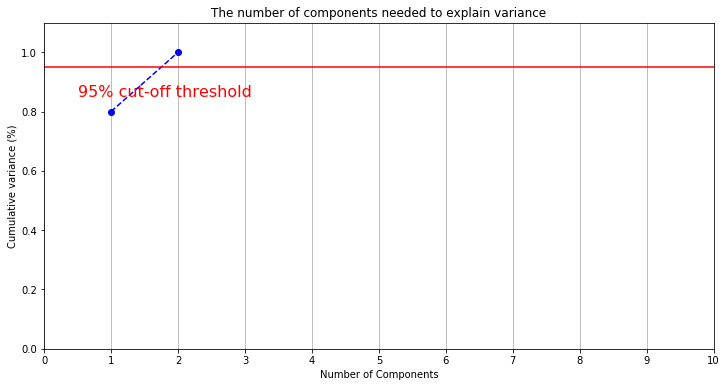

In [43]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 3, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### From what I understood from this excercise is that both features are needed to explain 95% of the variance in my dataset.

### Part 3

### KMeans - PCA

In [79]:
from sklearn.cluster import KMeans
import mglearn
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_t_scaled = scaler.fit_transform(X_train)
pcaKmean = PCA(n_components=0.95)
pcaKmean.fit(X_t_scaled)

X_pca = pcaKmean.transform(X_t_scaled)

Text(0, 0.5, 'Feature 1')

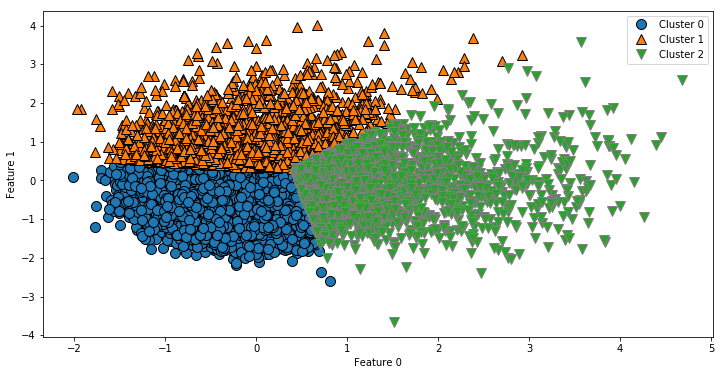

In [82]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

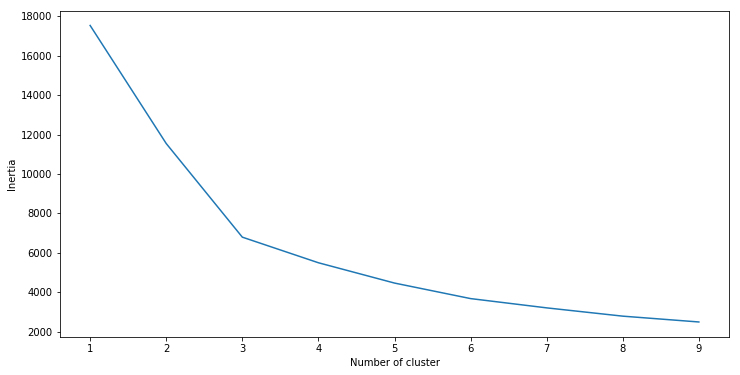

In [81]:
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_pca4)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

### KMeans - No PCA

Text(0, 0.5, 'Feature 1')

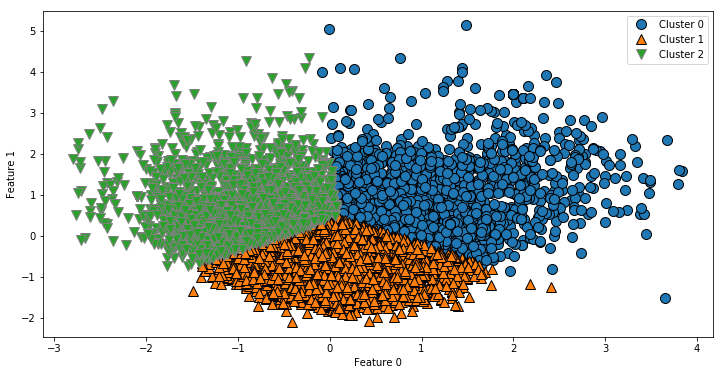

In [84]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_t_scaled)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Agglomerative - PCA

In [86]:
from sklearn.cluster import AgglomerativeClustering

scaler = StandardScaler()
X_t_scaled = scaler.fit_transform(X_train)
pcaKmean = PCA(n_components=0.95)
pcaKmean.fit(X_t_scaled)

X_pca = pcaKmean.transform(X_t_scaled)

In [97]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_pca)

Text(0, 0.5, 'Feature 1')

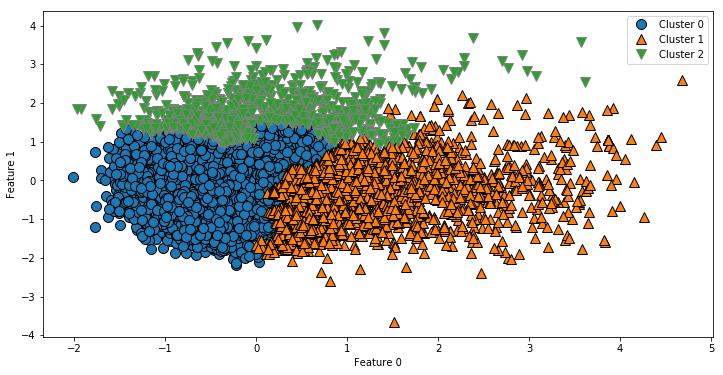

In [98]:
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

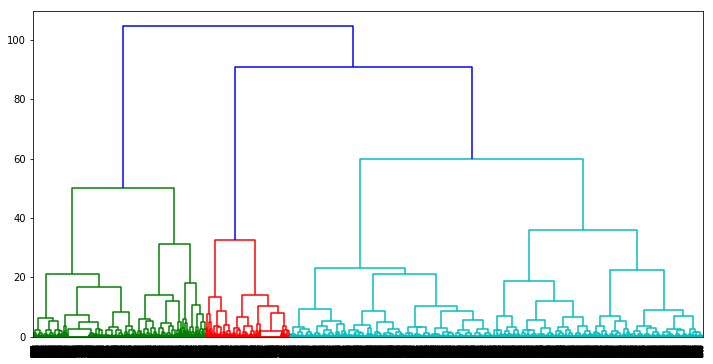

In [99]:
import scipy.cluster.hierarchy as shc

dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))

### Agglomerative - No PCA

In [100]:
agg_1 = AgglomerativeClustering(n_clusters=3)
assignment_1 = agg_1.fit_predict(X_t_scaled)

Text(0, 0.5, 'Feature 1')

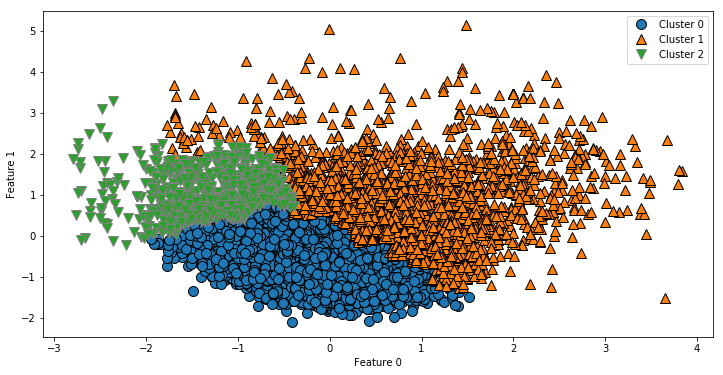

In [101]:
mglearn.discrete_scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], assignment_1)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

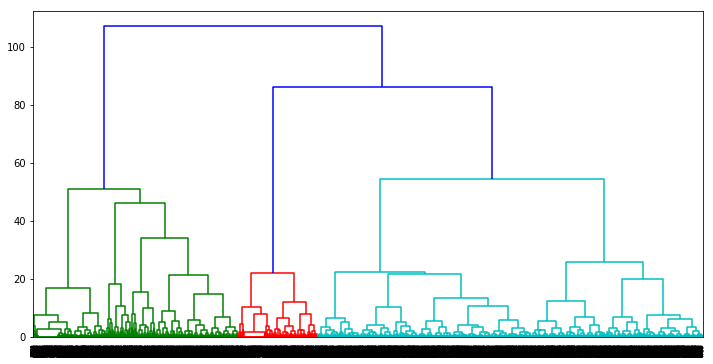

In [102]:
dend = shc.dendrogram(shc.linkage(X_t_scaled, method='ward'))

### DBSCAN - PCA

Text(0, 0.5, 'Feature 1')

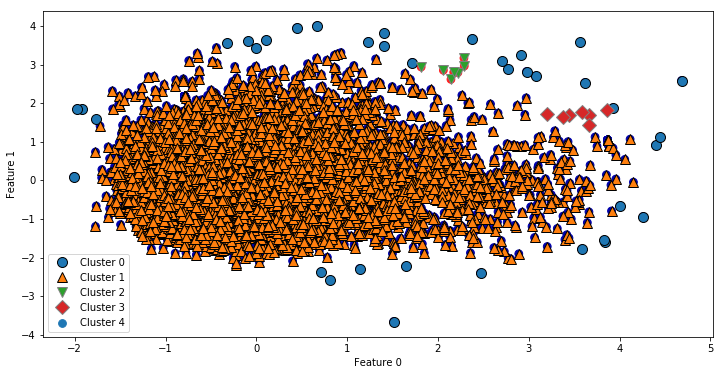

In [115]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.3)
clusters = dbscan.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### DBSCAN - No PCA

Text(0, 0.5, 'Feature 1')

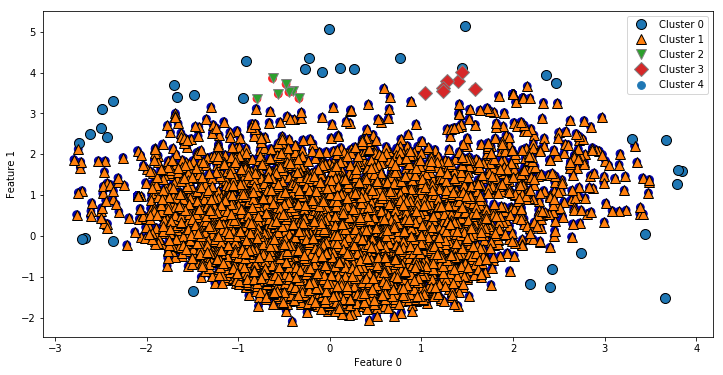

In [118]:
dbscan = DBSCAN(min_samples=5,eps=0.3)
clusters = dbscan.fit_predict(X_t_scaled)

plt.scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### ARI - No PCA

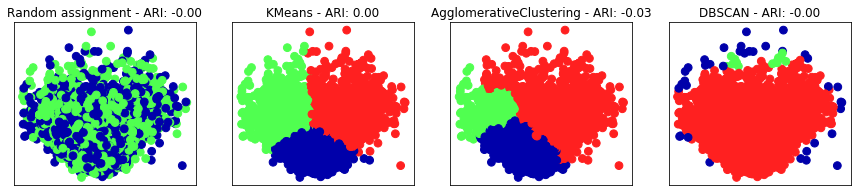

In [126]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(min_samples =5, eps = .3)]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

axes[0].scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_t_scaled)
    ax.scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

### Silhouette - No PCA

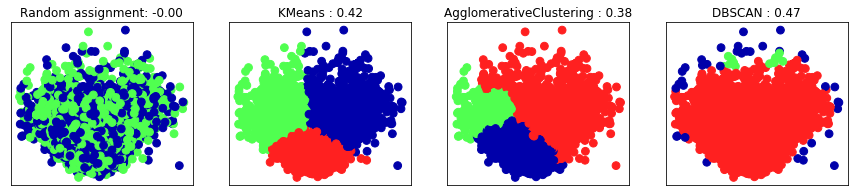

In [127]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

axes[0].scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_t_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(min_samples =5, eps = .3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_t_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_t_scaled, clusters)))

### ARI - PCA

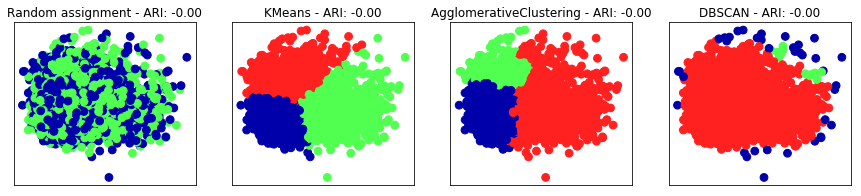

In [128]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
algorithms_1 = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(min_samples =5, eps = .3)]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters_1 = algorithm.fit_predict(X_t_scaled)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_1,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

### Silhouette - PCA

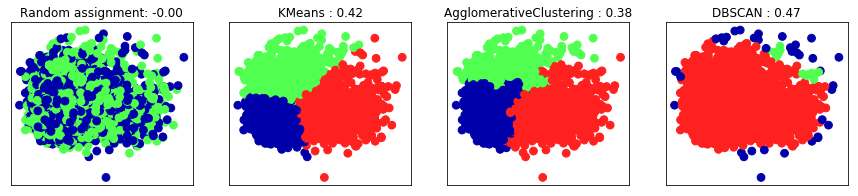

In [125]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_pca, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(min_samples =5, eps = .3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_pca)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_pca, clusters)))